In [80]:
import numpy as np
import math
import scipy.linalg as la
import matplotlib.pyplot as plt
import scipy
from mpl_toolkits.mplot3d import Axes3D


## Task 3.1

In [101]:
def Convdifsolve(g0, N, M, a, d):
     deltaX = 1/(N)  # rumssteg från x0 till xN-1
     dt = 1/M  # tidsteg från t0 till tN
     Xgrid = np.linspace(0, 1, N+1)
     tgrid = np.linspace(0, 1, M+1)
     T = la.toeplitz([2/(deltaX)**2, -1/(deltaX**2)] + [0] * (N-1)) ##Skapar en Toeplitz matris för disc av andraderivatan
     T[-1,0] = -1/(deltaX**2)
     T[0,-1] = -1/(deltaX**2)
     S = la.toeplitz([-1/(deltaX), 0] + [0] * (N-1), [-1/(deltaX), 1/(deltaX) ] + [0] * (N-1)) ##Skapar en Toeplitz matris för disc av förstaderivatan
     S[N,0] = 1/(deltaX)
     Xop = (d*T-a*S)*dt/2
     print(Xop)
     op = np.linalg.inv(np.eye(N+1)-Xop)@(np.eye(N+1)+Xop)
     Y = np.zeros((M+1, N+1)) #Första värdet är tidssteget, andra är x-steget.
     Y[0,:] = g0 #Sätter initialvärden

     for i in range(M):
          Y[i+1,:] = op@np.transpose(Y[i, :])
          #Y[i+1,-1] = Y[i+1,0]
     return Y, Xgrid, tgrid
          


In [82]:
def pulse(x):
    return np.exp(-100*(x-0.5)**2)

In [83]:
def plot3D(Y, Xgrid, tgrid):
     T, X = np.meshgrid(np.transpose(tgrid), Xgrid)

     # Create a 3D plot
     fig = plt.figure(figsize=(10, 10))  # You can adjust the size as needed
     ax = fig.add_subplot(111, projection='3d')
     ax.plot_surface(T, X, np.transpose(Y))

     ax.set_xlabel('Time')
     ax.set_ylabel('Space')
     ax.set_zlabel('Value')

     plt.show()

[[ 1.05 -0.6   0.   -0.45]
 [-0.45  1.05 -0.6   0.  ]
 [ 0.   -0.45  1.05 -0.6 ]
 [-0.6   0.   -0.45  1.05]]


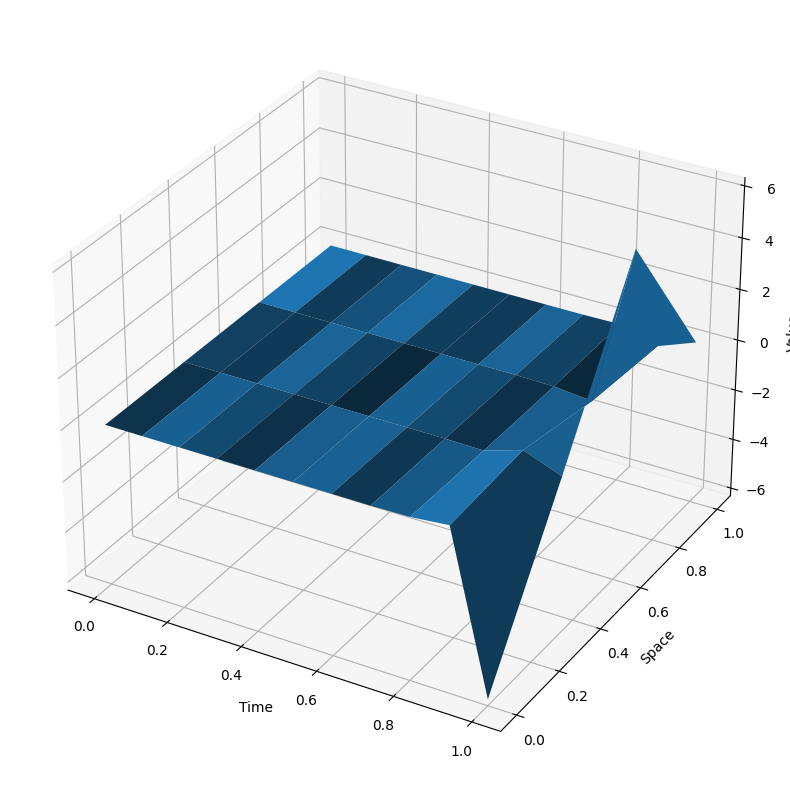

In [104]:
a = 1 
d = 1
N = 3
M = 10
g0 = pulse(np.linspace(0, 1, N+1))
Y, Xgrid, tgrid = Convdifsolve(g0, N, M, a, d)
plot3D(Y, Xgrid, tgrid)


In [85]:
print(Y[M,int(N/2)])
print(Y[M,int(N)])

2.4707213873093765e+20
-9.378050314599337e+19
